# Gradient Descent

## Implementing Gradient Descent to Linear Regression

### Steps of Gradient Descent procedures:
1. Data preparation
2. Mean Square Error of Gradient Descent
3. Batch Gradient Descent
4. Stochastic Gradient Descent


In [58]:
using CSV
using DataFrames
using Plots

In [76]:
data = CSV.read("Car_sales.csv", DataFrame)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type
,String,String,Float64,Float64?,String
1,Acura,Integra,16.919,16.36,Passenger
2,Acura,TL,39.384,19.875,Passenger
3,Acura,CL,14.114,18.225,Passenger
4,Acura,RL,8.588,29.725,Passenger
5,Audi,A4,20.397,22.255,Passenger
6,Audi,A6,18.78,23.555,Passenger
7,Audi,A8,1.38,39.0,Passenger
8,BMW,323i,19.747,missing,Passenger
9,BMW,328i,9.231,28.675,Passenger


In [60]:
x_data = data[:,8]
y_data = data[:,6]

data_tuples = [x for x in zip(x_data,y_data)]

156-element Array{Tuple{Int64,Float64},1}:
 (140, 21.5)
 (225, 28.4)
 (225, 22.0)
 (210, 42.0)
 (150, 23.99)
 (200, 33.95)
 (310, 62.0)
 (170, 26.99)
 (193, 33.4)
 (193, 38.9)
 (175, 21.975)
 (240, 25.3)
 (205, 31.965)
 ⋮
 (115, 14.9)
 (115, 16.7)
 (150, 21.2)
 (115, 19.99)
 (115, 17.5)
 (115, 15.9)
 (160, 23.4)
 (160, 24.4)
 (168, 27.5)
 (168, 28.8)
 (236, 45.5)
 (201, 36.0)

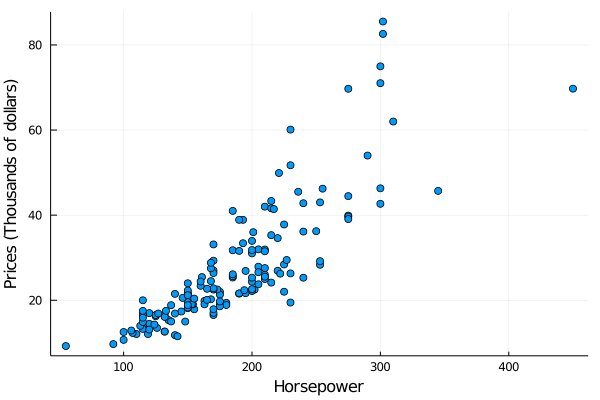

In [61]:
scatter(data_tuples,
        xaxis = "Horsepower",
        yaxis = "Prices (Thousands of dollars)",
        legend = false)

## Mean Squared Error (MSE) 

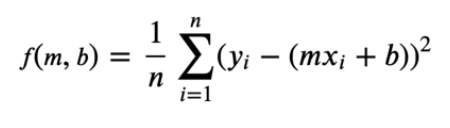


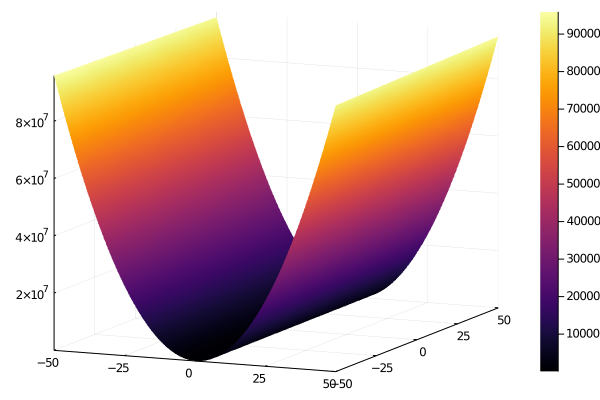

In [62]:
C(w,b) = (1/length(x_data))*sum([(y_data[i] - (w*x_data[i] + b))^2 for i = 1:length(x_data)])

w = -50:0.5:50
b = -50:0.5:50

plot(w, b, C, st = :surface)

## Implement batch size and learning rate to train the model

Gradient Descent: Gradient is a vector pointing at the greatest increase of a function, negative gradient is a vector pointing at the greatest decrease of a function. Therefore, we can minimize a function by iteratively moving a little bit in the direction of negative gradient.

Batch Gradient Descent: uses the whole batch of training data at every step. It calculates the error for each record and takes an average to determine the gradient.

In [67]:
function batch_gradient_descent(x_data, y_data, w, b, α)
    
    N = length(x_data)
    
    w = w - (-2/N)*α*sum([x_data[i]*(y_data[i] - (w*x_data[i] + b)) for i = 1:N])
    
    b = b - (-2/N)*α*sum([(y_data[i] - (w*x_data[i] + b)) for i = 1:N])
    
    return w, b
end

function batch_train(x_data, y_data, w, b, α, epochs)
    for i = 1:epochs
        w, b = batch_gradient_descent(x_data, y_data, w, b, α)
        
        if i == 1
            println("Epoch ", i, " with cost: ", C(w,b))
        end
        
        if i == 100
            println("Epoch ", i, " with cost: ", C(w,b))
        end
        
        if i == 1000
            println("Epoch ", i, " with cost: ", C(w,b))
        end        
        
        if i == 10000
            println("Epoch ", i, " with cost: ", C(w,b))
        end

        if i == 100000
            println("Epoch ", i, " with cost: ", C(w,b))
        end
    end
    
    return w,b
end

batch_train (generic function with 1 method)

Epoch 1 with cost: 125.68449495796796


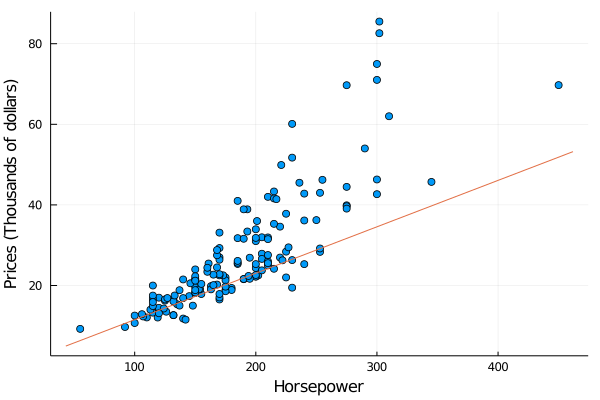

In [68]:
w, b = batch_train(x_data, y_data, 0.0, 0.0, 0.00001, 1)

scatter(data_tuples,
        xaxis = "Horsepower",
        yaxis = "Prices (Thousands of dollars)",
        legend = false)

plot!(x-> x*w + b,
      legend = false)

Epoch 1 with cost: 125.68449495796796
Epoch 100 with cost: 73.11776473212062


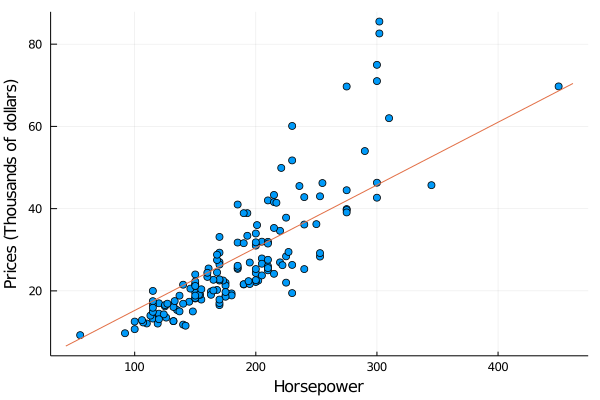

In [69]:
w, b = batch_train(x_data, y_data, 0.0, 0.0, 0.00001, 100)

scatter(data_tuples,
        xaxis = "Horsepower",
        yaxis = "Prices (Thousands of dollars)",
        legend = false)

plot!(x-> x*w + b,
      legend = false)

Epoch 1 with cost: 125.68449495796796
Epoch 100 with cost: 73.11776473212062
Epoch 1000 with cost: 73.08136776056699


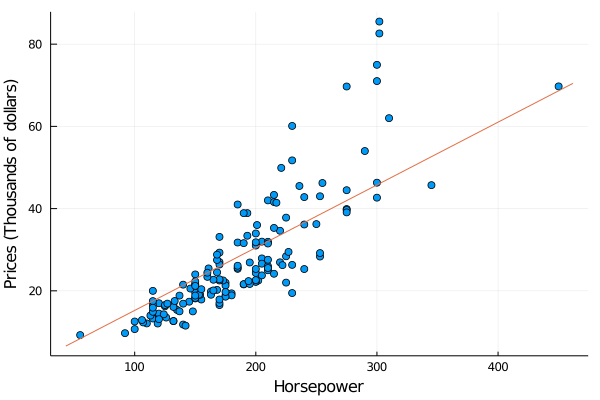

In [70]:
w, b = batch_train(x_data, y_data, 0.0, 0.0, 0.00001, 1000)

scatter(data_tuples,
        xaxis = "Horsepower",
        yaxis = "Prices (Thousands of dollars)",
        legend = false)

plot!(x-> x*w + b,
      legend = false)

Epoch 1 with cost: 125.68449495796796
Epoch 100 with cost: 73.11776473212062
Epoch 1000 with cost: 73.08136776056699
Epoch 10000 with cost: 72.72342821512564


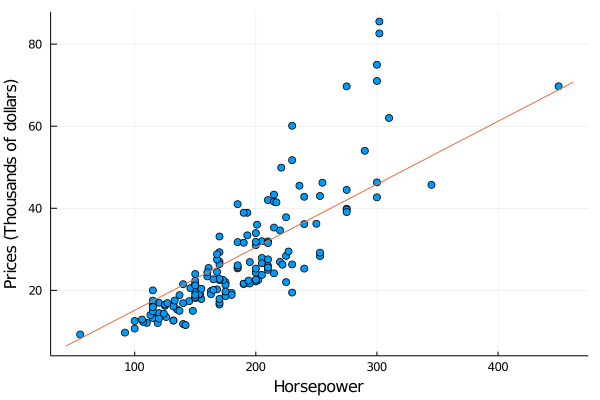

In [71]:
w, b = batch_train(x_data, y_data, 0.0, 0.0, 0.00001, 10000)

scatter(data_tuples,
        xaxis = "Horsepower",
        yaxis = "Prices (Thousands of dollars)",
        legend = false)

plot!(x-> x*w + b,
      legend = false)

Epoch 1 with cost: 125.68449495796796
Epoch 100 with cost: 73.11776473212062
Epoch 1000 with cost: 73.08136776056699
Epoch 10000 with cost: 72.72342821512564
Epoch 100000 with cost: 69.68431287619174


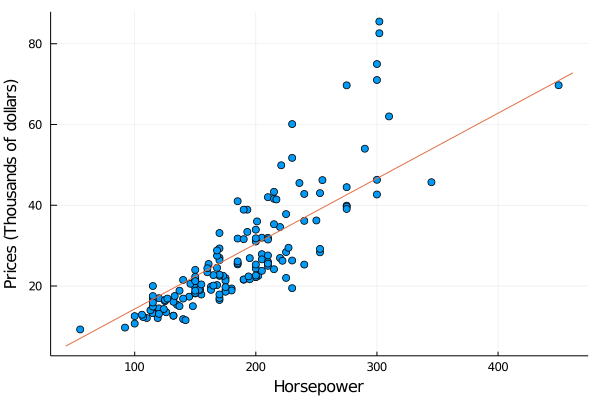

In [72]:
w, b = batch_train(x_data, y_data, 0.0, 0.0, 0.00001, 100000)

scatter(data_tuples,
        xaxis = "Horsepower",
        yaxis = "Prices (Thousands of dollars)",
        legend = false)

plot!(x-> x*w + b,
      legend = false)

## Stochastic Gradient Descent

Stochastic Gradient Descent: select only one instance from training set at every step and update gradient only based on that single record.

In [73]:
function stochastic_gradient_descent(x_data, y_data, w, b, α)
    
    N = length(x_data)
    
    i = rand([k for k = 1:N])
    
    w = w - (-2/N)*α*x_data[i]*(y_data[i] - (w*x_data[i] + b))
    
    b = b - (-2/N)*α*(y_data[i] - (w*x_data[i] + b))
    
    return w, b
end

function stochastic_train(x_data, y_data, w, b, α, epochs)
    for i = 1:epochs
        w, b = batch_gradient_descent(x_data, y_data, w, b, α)
        
        if i == 1
            println("Epoch ", i, " with cost: ", C(w,b))
        end
        
        if i == 100
            println("Epoch ", i, " with cost: ", C(w,b))
        end
        
        if i == 1000
            println("Epoch ", i, " with cost: ", C(w,b))
        end        
        
        if i == 10000
            println("Epoch ", i, " with cost: ", C(w,b))
        end

        if i == 100000
            println("Epoch ", i, " with cost: ", C(w,b))
        end
    end
    
    return w,b
end

stochastic_train (generic function with 1 method)

Epoch 1 with cost: 125.68449495796796
Epoch 100 with cost: 73.11776473212062
Epoch 1000 with cost: 73.08136776056699
Epoch 10000 with cost: 72.72342821512564


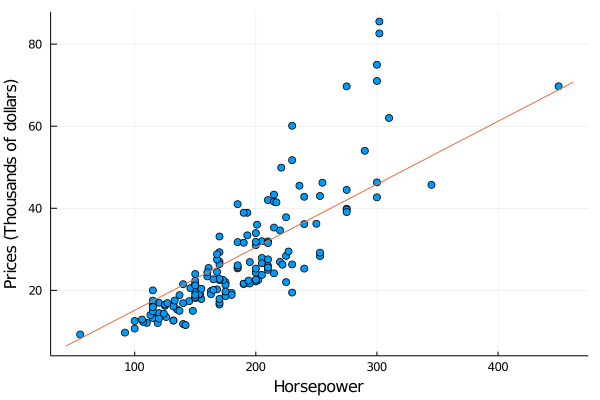

In [74]:
w, b = stochastic_train(x_data, y_data, 0.0, 0.0, 0.00001, 10000)

scatter(data_tuples,
        xaxis = "Horsepower",
        yaxis = "Prices (Thousands of dollars)",
        legend = false)

plot!(x-> x*w + b,
      legend = false)